<a href="https://colab.research.google.com/github/hrushikeshmeka/COVID_Predictor/blob/master/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hrushikeshmeka","key":"48804c727df75dfd211d234877e89fd0"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [6]:

!kaggle datasets download -d "tawsifurrahman/covid19-radiography-database"

100% 743M/745M [00:04<00:00, 183MB/s]
100% 745M/745M [00:04<00:00, 179MB/s]


In [ ]:
! unzip covid19-radiography-database.zip -d covid19-radiography-database

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import glob as glob

In [9]:
image_size =[224,224]

In [10]:
vgg19 = VGG19(input_shape = image_size+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [11]:
for layer in vgg19.layers:
    layer.trainable=False

In [12]:
from glob import glob
floder = glob('covid19-radiography-database/COVID-19_Radiography_Dataset/*')

In [ ]:
floder

In [14]:
x = Flatten()(vgg19.output)
x1 = Dense(4,activation = 'softmax')(x)
model = Model(inputs = vgg19.input,outputs = x1)

In [ ]:
model.summary()

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [17]:
datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [18]:
train_generator = datagen.flow_from_directory(
    'covid19-radiography-database/COVID-19_Radiography_Dataset',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
     subset='training')

Found 16933 images belonging to 4 classes.


In [19]:
validation_generator = datagen.flow_from_directory(
    'covid19-radiography-database/COVID-19_Radiography_Dataset',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation')

Found 4232 images belonging to 4 classes.


In [20]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [21]:
 h = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 50)

Epoch 1/50
529/529 [==============================] - 306s 507ms/step - loss: 0.8754 - accuracy: 0.6886 - val_loss: 0.4503 - val_accuracy: 0.8362
Epoch 2/50
529/529 [==============================] - 267s 505ms/step - loss: 0.5006 - accuracy: 0.8158 - val_loss: 0.4145 - val_accuracy: 0.8525
Epoch 3/50
529/529 [==============================] - 264s 499ms/step - loss: 0.4631 - accuracy: 0.8310 - val_loss: 0.4110 - val_accuracy: 0.8532
Epoch 4/50
529/529 [==============================] - 263s 497ms/step - loss: 0.4288 - accuracy: 0.8424 - val_loss: 0.5543 - val_accuracy: 0.8087
Epoch 5/50
529/529 [==============================] - 263s 497ms/step - loss: 0.4713 - accuracy: 0.8312 - val_loss: 0.4406 - val_accuracy: 0.8442
Epoch 6/50
529/529 [==============================] - 262s 495ms/step - loss: 0.4095 - accuracy: 0.8513 - val_loss: 0.5621 - val_accuracy: 0.8146
Epoch 7/50
529/529 [==============================] - 262s 496ms/step - loss: 0.4623 - accuracy: 0.8363 - val_loss: 0.4392 -

No handles with labels found to put in legend.


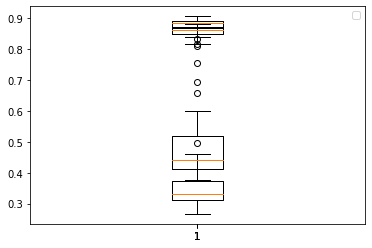

"\nplt.plot(h.history['accuracy'], label='train acc')\nplt.plot(h.history['val_accuracy'], label='val acc')\nplt.legend()\nplt.show()\nplt.savefig('AccVal_acc')"

<Figure size 432x288 with 0 Axes>

In [28]:
"""import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('loss_acc')"""
plt.boxplot(h.history['loss'])
plt.boxplot(h.history['val_loss'])
plt.boxplot(h.history['accuracy'])
plt.boxplot(h.history['val_accuracy'])
plt.legend()
plt.show()
plt.savefig('box_plot')
"""
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')"""

In [29]:
from tensorflow.keras.models import load_model
model.save('lung_analysis.h5')
print("loaded")

loaded


# New Section